# Menentukan Pertanyaan Bisnis

- Bagaimana Tren Penggunaan Sepeda dalam setahun. Apakah 2011 atau 2012 yang lebih unggul?
- Bagaimana Kondisi Penyewaan saat Workingday,Weekday & Holiday?


**Menyiapkan semua library yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
day_df = pd.read_csv(r"C:\Users\qq\Documents\submission\data\day.csv")
hour_df = pd.read_csv(r"C:\Users\qq\Documents\submission\data\hour.csv")

__Assesing Data__

1.Mengecek tipe data day_df

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


ada kolom yang tidak sesuai dengan datatype, yaitu dteday.Kita perlu perbaiki menjadi datetime

2. Mengecek apakah ada missing values

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing values

3.Mengecek apakah ada data yang terduplikasi

In [5]:
print("jumlah duplikasi :", day_df.duplicated().sum())

jumlah duplikasi : 0


tidak ada yang datanya duplikat. berarti semua data bersifat unik

4.Memeriksa nilai statistiknya

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada yang aneh di nilai statisnya

**Menilai data hour_df**

1. Cek Info hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


seperti tadi, kita perbaiki dteday dtype menjadi datetime

2. Missing Values

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada yang missing

3. Cek duplikat

In [9]:
print("jumlah duplikasi: ", hour_df.duplicated().sum())

jumlah duplikasi:  0


tidak ada yang duplikat semua data bersifat unik

4. mengecek nilai statistiknya

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada yang aneh dalam nilai statisnya

saya akan menyortir data dari Hour_df karena terlalu banyak maka saya akan mengambil dari 1000 dari atas

In [11]:
hour_df_sorted = hour_df.sort_values(by='registered', ascending=True)
hour_df_top_1000 = hour_df_sorted.head(1000)


__Cleaning Data__

1.menggunakan satu tabel saja
karena hour dan day itu bedanya hanya di kolom hr nya saja,selebihnya sama semua

In [12]:
del day_df

Menghapus colomn yang tidak diperlukan

In [13]:
drop_col = ['instant', 'windspeed', 'temp' , 'atemp', 'weathersit','hum','season',]

for i in hour_df.columns:
    if i in drop_col:
        hour_df.drop(labels=i, axis=1, inplace=True)
hour_df.head()

,dteday,yr,mnth,hr,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,0,1,0,0,6,0,3,13,16
1,2011-01-01,0,1,1,0,6,0,8,32,40
2,2011-01-01,0,1,2,0,6,0,5,27,32
3,2011-01-01,0,1,3,0,6,0,3,10,13
4,2011-01-01,0,1,4,0,6,0,0,1,1


Rename Kolom agar lebih kelihatan jelas

In [14]:
hour_df.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'cnt' : 'count'
}, inplace=True)
hour_df.head()

,dateday,year,month,hr,holiday,weekday,workingday,casual,registered,count
0,2011-01-01,0,1,0,0,6,0,3,13,16
1,2011-01-01,0,1,1,0,6,0,8,32,40
2,2011-01-01,0,1,2,0,6,0,5,27,32
3,2011-01-01,0,1,3,0,6,0,3,10,13
4,2011-01-01,0,1,4,0,6,0,0,1,1


Merubah datatype kolom month,workingday dan weekday menjadi categorical

In [15]:
hour_df['month'] = hour_df.month.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

Merubah dateday dtype menjadi datetime

In [16]:
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

merubah kolom season,month dan weekday menjadi keterangan

In [17]:
hour_df['month'] = hour_df['month'].map({
  1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'  
})

hour_df['weekday'] = hour_df['weekday'].map({
0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'
})

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   year        17379 non-null  int64         
 2   month       17379 non-null  category      
 3   hr          17379 non-null  int64         
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  category      
 6   workingday  17379 non-null  category      
 7   casual      17379 non-null  int64         
 8   registered  17379 non-null  int64         
 9   count       17379 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(6)
memory usage: 1002.3 KB


# Exploratory Data Analysis

 ## Eksplor data hour_df


1. compare Penyewa berdasar Weekday vs weekend

In [19]:
hour_df.groupby(by='weekday',observed=True).agg({
    'count' : ['max', 'min', 'mean']
})

count                
          max min        mean
weekday                      
Sun       776   1  177.468825
Mon       968   1  183.744655
Tue       970   1  191.238891
Wed       977   1  191.130505
Thur      976   1  196.436665
Fri       957   1  196.135907
Sat       783   1  190.209793

Bisa kita lihat dari tabel, Urutan rata-rata dari yang terbesar(mean) yaitu : 1.jumat(fri),2.kamis(thur),3.Sabtu(sat),4.Rabu(Wed)
5.Selasa(Tue),6.Senin(mon),lalu 7.Minggu

2. mengelompokkan pengguna berdasar Holiday

In [20]:
hour_df.groupby(by='holiday',observed=True).agg({
    'count' : ['max', 'min', 'mean']
})

count               
          max min       mean
holiday                     
0         977   1  190.42858
1         712   1  156.87000

dari analisa diatas bahwa para pengguna lebih memakai pada non-holiday

3.Mengelompokkaan perngguna berdasarkan workingday

In [21]:
hour_df.groupby(by='workingday',observed=True).agg({
    'count' : ['max', 'min', 'mean']
})

count                
             max min        mean
workingday                      
0            783   1  181.405332
1            977   1  193.207754

pengguna casual dan registered lebih menggunakan pada hari kerja daripada hari non-workingday

__5.Kelompokkan penyewa sepeda(Casual & registered) berdasar bulan__

In [22]:
hour_df.groupby(by='month',observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
        max min        mean     sum
month                              
Jan     559   1   94.424773  134933
Feb     610   1  112.865026  151352
Mar     957   1  155.410726  228920
Apr     822   1  187.260960  269094
May     873   1  222.907258  331686
Jun     900   1  240.515278  346342
Jul     913   1  231.819892  344948
Aug     941   1  238.097627  351194
Sep     977   1  240.773138  345991
Oct     963   1  222.158511  322352
Nov     729   1  177.335421  254831
Dec     759   1  142.303439  211036

Dari data diatas dapat simpulkan,bulan yang memiliki rata-rata terbesar dan jumlah yang banyak yaitu bulan September,Sedangkan rata-rata terkecil dan jumlah terkecil yaitu bulan Januar

# Visualization dan Explanatory Analysis

__Pertanyaan 1: Bagaimana Tren pengguna sepeda dalam setahun. Apakah 2011 atau 2012 yang unggul?__

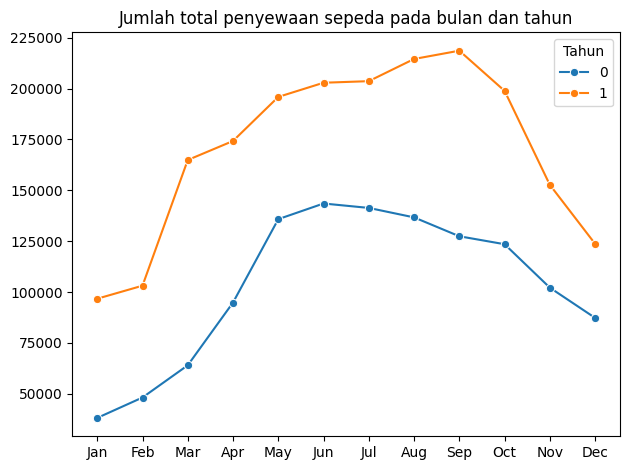

In [23]:
hour_df['month'] = pd.Categorical(hour_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
ordered=False)

total_months=hour_df.groupby(by=['month','year'],observed=True).agg({
    'count' : 'sum'
}).reset_index()

sns.lineplot(
    data=total_months,
    x='month',
    y='count',
    hue='year',
    marker='o'
)

plt.title("Jumlah total penyewaan sepeda pada bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc='upper right')
plt.tight_layout()
plt.show()

Berdasarkan hasil Visualisasi menggunakan Lineplot, dapat diambil bahwa angka 1 (Tahun 2012) lebih besar penyewaanya daripada tahun 2011(angka0).Penyewaan tertinggi pada tahun 2012 yaitu pada bulan September dan penyewaan terendah pada bulan Januari.Sedangkan pada tahun 2011 penyewaan tertinggi pada bulan Juni dan terendah yaitu bulan Januari

__Pertanyaan 2: Bagaimana Kondisi penyewaan saat Workingday,Weekday dan Holiday?__

C:\Users\qq\AppData\Local\Temp\ipykernel_32896\1997938725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\qq\AppData\Local\Temp\ipykernel_32896\1997938725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\qq\AppData\Local\Temp\ipykernel_32896\1997938725.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


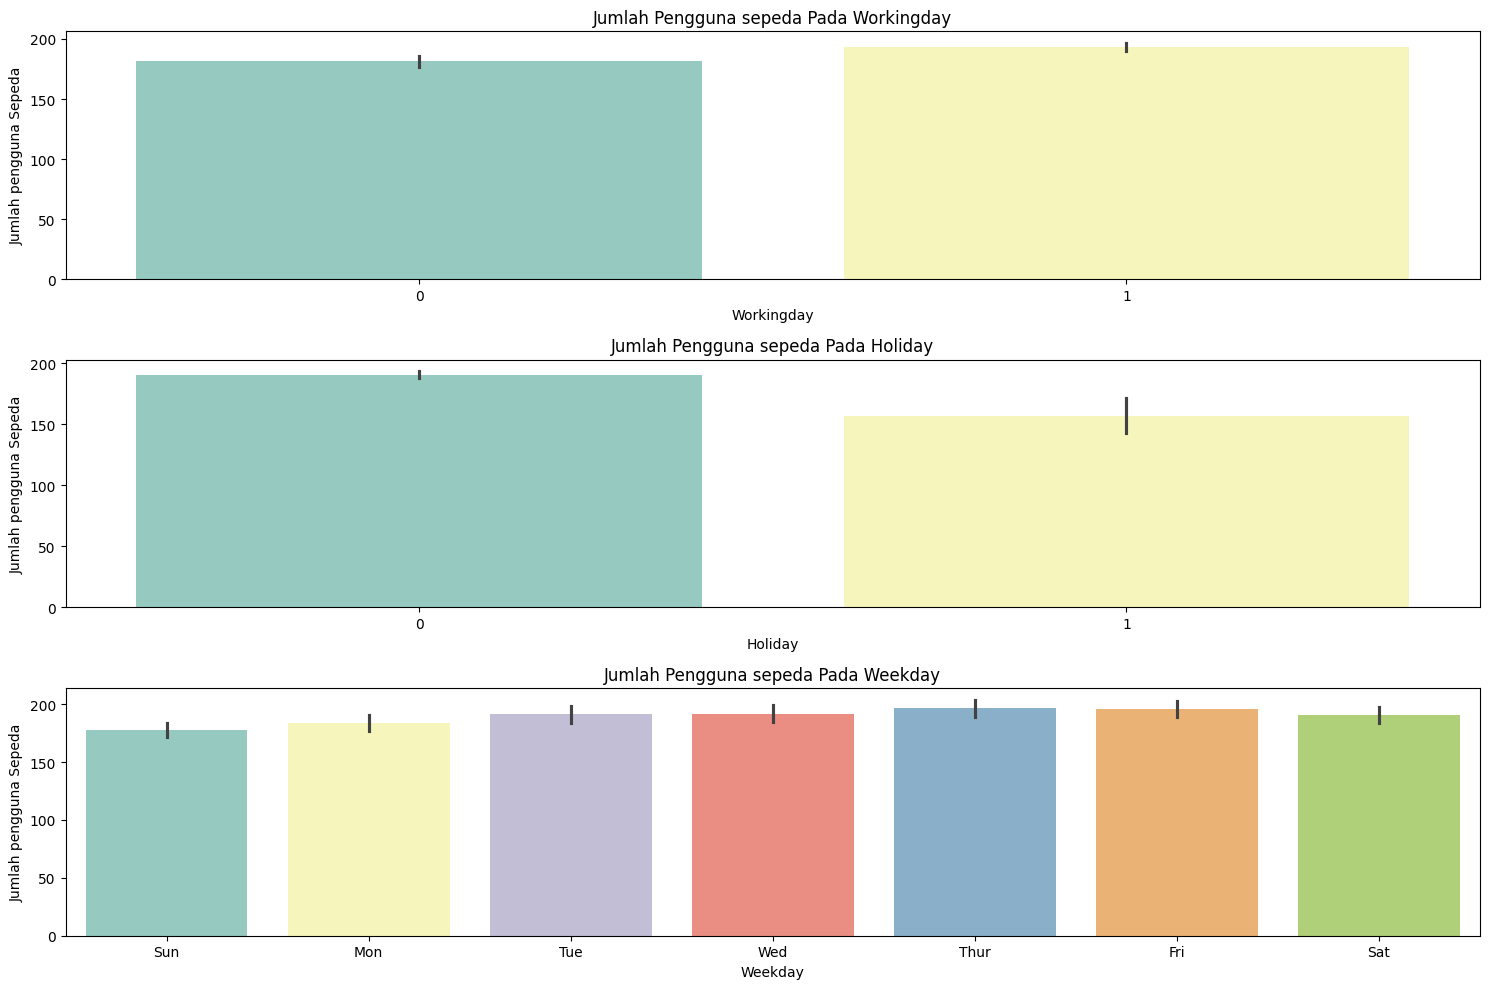

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

#berdasarkan Working day
sns.barplot(
    x='workingday',
    y='count',
    data=hour_df,
    palette='Set3',
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna sepeda Pada Workingday')
axes[0].set_xlabel('Workingday')
axes[0].set_ylabel('Jumlah pengguna Sepeda')

#berdasarkan Holiday
sns.barplot(
    x='holiday',
    y='count',
    data=hour_df,
    palette='Set3',
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna sepeda Pada Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Jumlah pengguna Sepeda')

#berdsarakan Weekday
sns.barplot(
    x='weekday',
    y='count',
    data=hour_df,
    palette='Set3',
    ax=axes[2])
axes[2].set_title('Jumlah Pengguna sepeda Pada Weekday')
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Jumlah pengguna Sepeda')

plt.tight_layout()
plt.show()

dari Visualiasi menggunakan barplot, bisa diambil Poin-poin yaitu:

- Jumlah penyewa pada Workingday lebih banyak pada Workingday(Sen-Jum) daripada weekend(sab-ming), yang ditandai dengan barplot 0 sebagai workingday dan 1 sebagai weekend
- Jumlah penyewa jauh lebih banyak saat hari biasa (bukan hari libur) dibandingkan dengan hari libur.
- Jumlah terbesar penyewa sepeda pada weekday yaitu hari Kamis(Thur). Dan jumlah tekecil penyewa sepeda pada weekday jatuh pada hari minggu(Sun) 

## Conclusion

* Kesimpulan Pertanyaan 1:

pada visualisasi ini, dapat kita amati pada kedua tahun yaitu 2011 dan 2012. Terjadi perbedaan puncak penyewaan dan dasar penyewaan. Puncak penyewaan pada tahun 2011 yaitu pada bulan Juni mencapai 125.000 lebih penyewaan.Dan dasar penyewaan pada bulan Januari yang tidak mencapai 50000.Sedangkan pada tahun 2012 puncak penyewaan Terjadi pada bulan September mencapai 200000 lebih penyewaan sepeda.Dan dasar penyewaan pada bulan januari yang tidak mencapai 100000. Dan dari dua visualisasi tersebut, dapat kita amati bahwa tahun 2012 seluruhnya lebih tinggi daripada tahun 2011

* Kesimpulan Pertanyaan 2:

Kondisi yang tampak pada visualisasi ini terbagi menjadi 3, yaitu pengguna pada sepeda berdasarkan Holiday, Pengguna berdasarkan Weekday, dan pengguna berdasarkan Workingday , Non Workingday. Untuk jumlah pengguna sepeda berdasarkan workingday, workingday lah yang mengungguli non-workingday walaupun hasilnya memang tidak terlalu signifikan, tetapi tetap ada perbedaan yang jelas walaupun keduanya sama-sama diatas 4000 jumlah pengguna.Lalu untuk pengguna sepeda berdasar Holiday.Pengguna berdasar Non-Holiday lah yang mengungguli dengan perbedaan yang cukup signifikan daripada yang holiday.Hal ini mungkin pengguna lebih suka menyewa pada saat hari-hari biasa.Terakhir berdasarkan Weekday, dari visualisasi diatas Hari Kemis (Thur) yang menempati urutan pertama dengan rata-rata 196.436665 dan diurutan terakhir ada hari Minggu (Sun) dengan rata-rata 177.468825

simpan semua hasil data yang sudah dibersihkan 

In [25]:
hour_df.to_csv("all_data.csv", index=False)